# Principal Component Analysis

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [2]:
fname_data  = 'assignment_12_data.txt'
feature0    = np.genfromtxt(fname_data, delimiter=',')

number_data     = np.size(feature0, 0)
number_feature  = np.size(feature0, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 50
number of feature : 2


## plot the input data

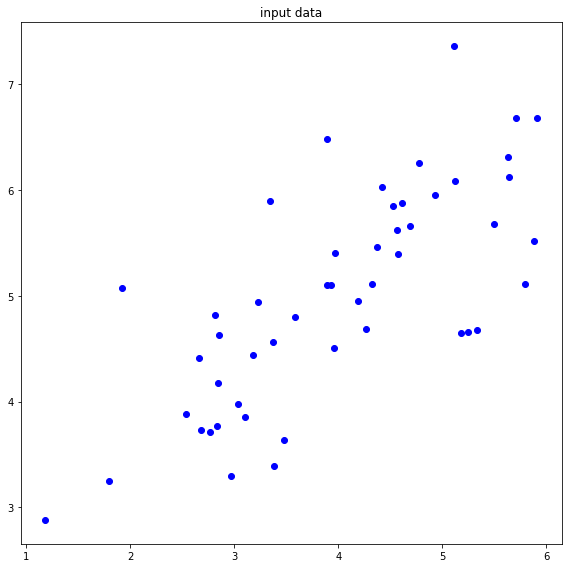

In [3]:
plt.figure(figsize=(8,8))   
plt.title('input data')

x0 = feature0[:,0]
y0 = feature0[:,1]

plt.scatter(x0, y0, color='blue')

plt.tight_layout()
plt.show()

## Normalization (Z-scoring)
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features

In [4]:
def normalize(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    x = feature[:,0]
    y = feature[:,1]
    new_x=(x-np.mean(x))/np.std(x)
    new_y=(y-np.mean(y))/np.std(y)
    feature_normalize=np.zeros([np.size(feature, 0),np.size(feature, 1)])
    feature_normalize[:,0]=new_x
    feature_normalize[:,1]=new_y


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return feature_normalize#,new_x,new_y
#print(normalize(feature0))
#print(normalize(feature0).shape)

[[-0.5233151  -1.59279489]
 [ 0.46381907  0.84034673]
 [-1.14839444 -0.58316356]
 [-1.0540573  -1.27072124]
 [-0.98402134 -0.8165806 ]
 [-0.0849036   1.46633237]
 [-0.4421533  -1.35221189]
 [ 1.65512791  1.65623047]
 [-0.05199109  0.09440519]
 [ 0.49306315  0.61245716]
 [ 0.50359481  0.38972985]
 [ 0.32935312  0.45242712]
 [ 0.17431471 -0.04749279]
 [ 1.08057125 -0.33689517]
 [-0.99325269 -1.21879266]
 [ 1.41742932  1.29234548]
 [ 0.60026562  0.65385394]
 [-0.98061987 -0.37147145]
 [ 0.96523968  2.32982142]
 [ 1.02758572 -0.35168114]
 [ 1.47948257  1.65649698]
 [-0.3527074  -0.1974352 ]
 [ 1.42096858  1.10315805]
 [ 0.23612685 -0.30931705]
 [-1.25100707 -1.10383121]
 [-0.65914163 -0.05946567]
 [ 0.80965876  0.93988062]
 [ 1.55322141  0.10421644]
 [-1.00960561 -0.18146477]
 [-0.08649669  0.09630032]
 [-0.55632233  0.87867379]
 [ 1.62794193  0.51189675]
 [-0.76240011 -1.13086645]
 [ 1.15585151 -0.3178945 ]
 [-0.52859385 -0.43176032]
 [ 0.678069    1.2353336 ]
 [-1.1311115  -1.25536277]
 

In [5]:
feature = normalize(feature0)

x   = feature[:, 0]
y   = feature[:, 1]

min_x = np.min(x)
min_y = np.min(y)

max_x = np.max(x)
max_y = np.max(y)
#print(x.mean(),y.mean(),min_x,min_y,max_x,max_y)

-1.509903313490213e-16 -4.840572387365683e-16 -2.418953364923859 -2.0966037709840473 1.6551279054675978 2.3298214228451353


## compute covariance matrix
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features

In [6]:
def compute_covariance(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    t=normalize(feature)
    # k=np.size(feature, 0)
    # Z = np.zeros([k,2,2])
    # for i in range(k):
    #     x=t[i][0]
    #     y=t[i][1]
    #     Z[i]=[[x*x,x*y],[x*y,y*y]]
    
    # Sigma_1=0
    # Sigma_2=0
    # Sigma_3=0
    # Sigma_4=0
    # for i in range(k):
    #     Sigma_1+=Z[i][0][0]
    #     Sigma_2+=Z[i][0][1]
    #     Sigma_3+=Z[i][1][0]
    #     Sigma_4+=Z[i][1][1]
    # Sigma=[[Sigma_1,Sigma_2],[Sigma_3,Sigma_4]]
    x=t[:,0]
    y=t[:,1]
    num=np.size(feature, 0)
    Sigma=[[np.sum(x*x)/num,np.sum(x*y)/num],[np.sum(x*y)/num,np.sum(y*y)/num]]
    
    
    #Sigma = Z.T*Z/np.size(feature, 0)


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return Sigma
#print(compute_covariance(feature0))

[[0.9999999999999999, 0.7355300038440324], [0.7355300038440324, 1.0]]


## compute principal components
- `np.linalg.eig`
- `argsort()`
- return the eigenvalues and the eigenvectors in a decreasing order according to the eigenvalues

In [7]:
def compute_principal_component(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    Sigma=compute_covariance(feature0)
    eigenValues, eigenVectors=np.linalg.eig(Sigma)
    idx = eigenValues.argsort()[::-1]
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    principal_component_1=(eigenValues[0]*eigenVectors[0]).reshape(2,1)
    principal_component_2=(eigenValues[1]*eigenVectors[1]).reshape(2,1)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    #return eigenValues[0],eigenVectors[0]
    return (principal_component_1, principal_component_2)
#print(compute_principal_component(feature0))

(array([[-1.22720503],
       [-1.22720503]]), array([[-0.18700853],
       [ 0.18700853]]))


## compute the projection of point onto the axis
- `np.matmul`
- `np.dot`
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features
- shape of vector = $m \times 1$ where $m$ is the dimension of features

In [8]:
def compute_projection_onto_line(feature, vector):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    # projection_sum=feature@vector
    # projection = np.zeros([len(feature),2])
    
    # k=projection_sum/(abs(vector[0])+abs(vector[1]))
    # t0=(k*vector[0]).reshape(1,len(feature))
    # t1=(k*vector[1]).reshape(1,len(feature))
    # projection[:,0]=t0
    # projection[:,1]=t1
    x=feature[:,0]
    y=feature[:,1]
    projection = np.zeros([len(feature),2])
    if (vector[0]/vector[1])==1: # principal_component1정사영
        projection[:,0]=(x+y)/2
        projection[:,1]=(x+y)/2
    if (vector[0]/vector[1])==-1: # principal_component2정사영
        projection[:,0]=(x-y)/2
        projection[:,1]=(-x+y)/2
    else:## 나머지경우 즉, 일반적인 경우 정사영
        a_b=vector[0]/vector[1]
        projection[:,0]=(a_b*y+x)/2
        projection[:,1]=((1/a_b)*x+y)/2
        
    


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return projection
(principal_component_1, principal_component_2) = compute_principal_component(feature)
#print(compute_projection_onto_line(normalize(feature0), principal_component_1))
#print(principal_component_2)
#print(compute_projection_onto_line(normalize(feature0), principal_component_2))

## compute the principal components and the projection of feature

In [9]:

(principal_component_1, principal_component_2) = compute_principal_component(feature)

projection1 = compute_projection_onto_line(feature, principal_component_1)
projection2 = compute_projection_onto_line(feature, principal_component_2)
#print(projection2)

---

---

## functions for presenting the results

---

---

In [10]:
def function_result_01():
   
    plt.figure(figsize=(8,8))
    plt.title('data normalized by z-scoring')
    plt.scatter(x, y, color='blue')

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [11]:
def function_result_02():

    plt.figure(figsize=(8,8))
    plt.title('principal components')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(x, y, color='blue')
    plt.annotate('', ha = 'center', va = 'bottom',xytext = (0, 0),xy = (compute_principal_component(feature0)[0][0], compute_principal_component(feature0)[0][1]),
    arrowprops = { 'facecolor' : 'r'}
    )
    plt.annotate('', ha = 'center', va = 'bottom',xytext = (0, 0),xy = (compute_principal_component(feature0)[1][0], compute_principal_component(feature0)[1][1]),
    arrowprops = { 'facecolor' : 'g'}
    )

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [12]:
def function_result_03():

    plt.figure(figsize=(8,8))
    plt.title('first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    plt.scatter(x, y, color='blue')
    X_3=np.linspace(-3,3,100)
    Y_3=(X_3*compute_principal_component(feature0)[0][0]/compute_principal_component(feature0)[0][1])
    plt.plot(X_3,Y_3,'-',color='red')



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [13]:
def function_result_04():

    plt.figure(figsize=(8,8))
    plt.title('second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(x, y, color='blue')
    X_3=np.linspace(-3,3,100)
    Y_3=(X_3*compute_principal_component(feature0)[1][0]/compute_principal_component(feature0)[1][1])
    plt.plot(X_3,Y_3,'-',color='green')


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [14]:
def function_result_05():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(x, y, color='blue')
    X_3=np.linspace(-3,3,100)
    Y_3=(X_3*compute_principal_component(feature0)[0][0]/compute_principal_component(feature0)[0][1])
    plt.plot(X_3,Y_3,'-',color='red')
    
    plt.scatter(projection1[:,0],projection1[:,1])


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()


In [15]:
def function_result_06():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(x, y, color='blue')
    X_3=np.linspace(-3,3,100)
    Y_3=(X_3*compute_principal_component(feature0)[1][0]/compute_principal_component(feature0)[1][1])
    plt.plot(X_3,Y_3,'-',color='green')
    
    plt.scatter(projection2[:,0],projection2[:,1])

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [16]:
def function_result_07():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(x, y, color='blue')
    X_3=np.linspace(-3,3,100)
    Y_3=(X_3*compute_principal_component(feature0)[0][0]/compute_principal_component(feature0)[0][1])
    plt.plot(X_3,Y_3,'-',color='red')
    
    plt.scatter(projection1[:,0],projection1[:,1])
    for i in range(50):
        plt.plot((x[i],projection1[:,0][i]),(y[i],projection1[:,1][i]),color='black')


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [17]:
def function_result_08():

    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(x, y, color='blue')
    X_3=np.linspace(-3,3,100)
    Y_3=(X_3*compute_principal_component(feature0)[1][0]/compute_principal_component(feature0)[1][1])
    plt.plot(X_3,Y_3,'-',color='green')
    
    plt.scatter(projection2[:,0],projection2[:,1])
    for i in range(50):
        plt.plot((x[i],projection2[:,0][i]),(y[i],projection2[:,1][i]),color='black')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************


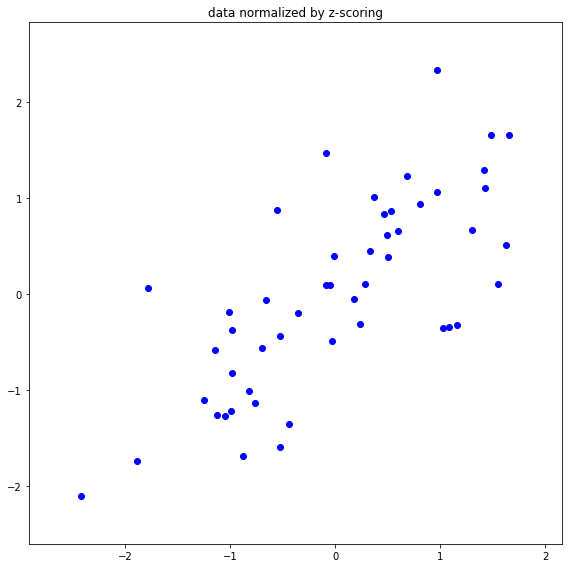

**************************************************
## [RESULT 02]
**************************************************


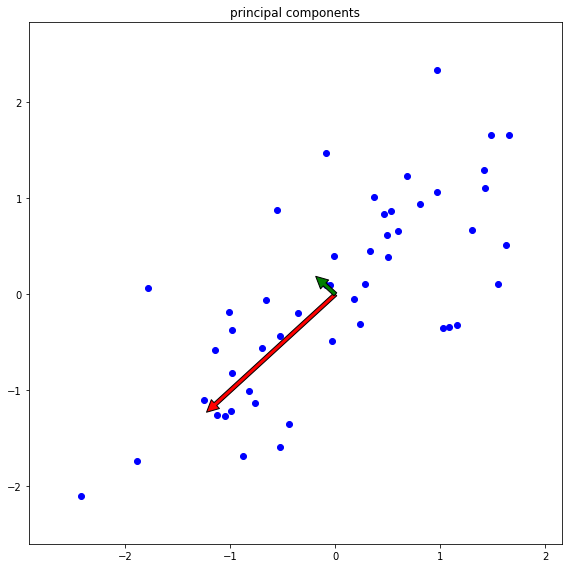

**************************************************
## [RESULT 03]
**************************************************


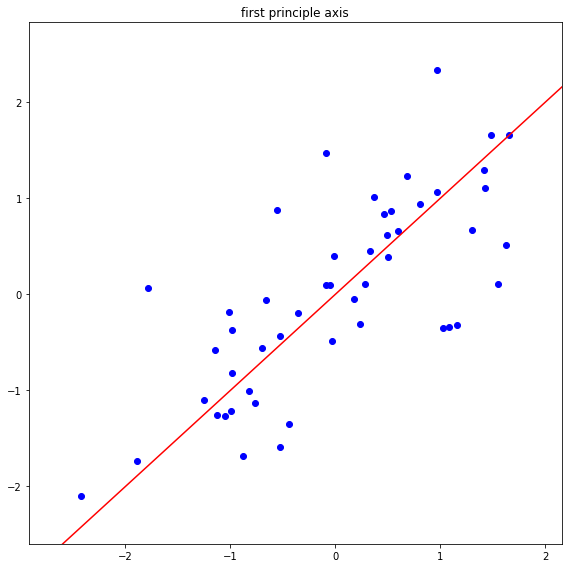

**************************************************
## [RESULT 04]
**************************************************


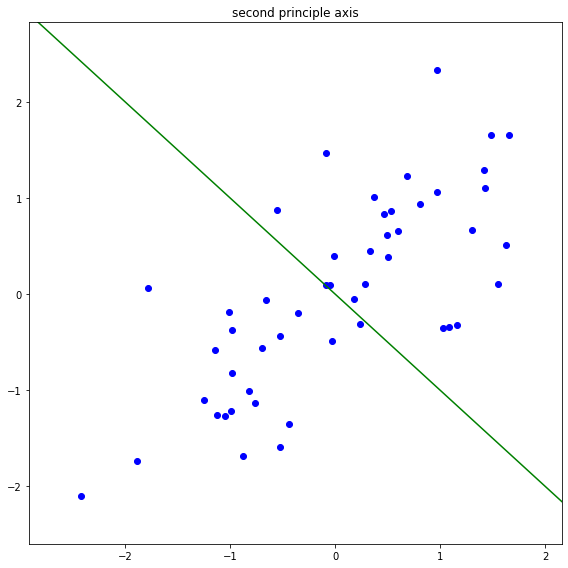

**************************************************
## [RESULT 05]
**************************************************


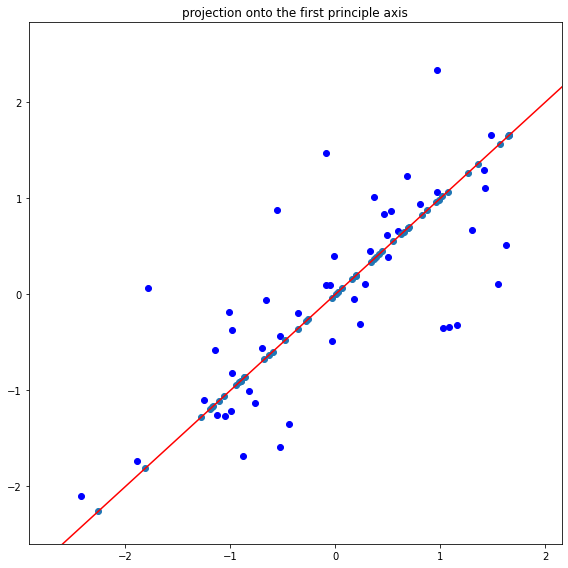

**************************************************
## [RESULT 06]
**************************************************


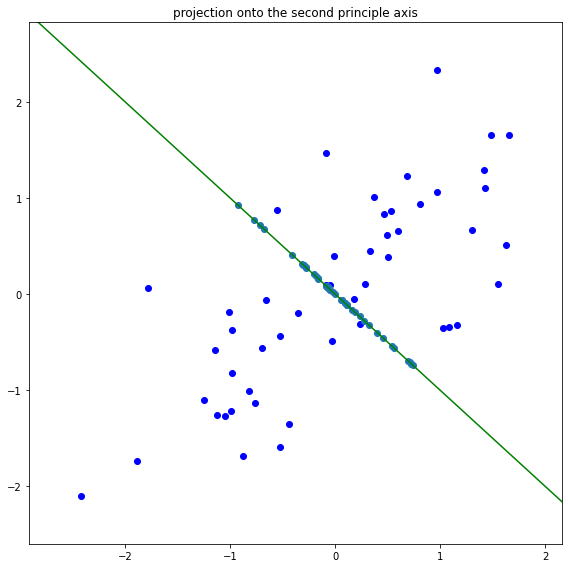

**************************************************
## [RESULT 07]
**************************************************


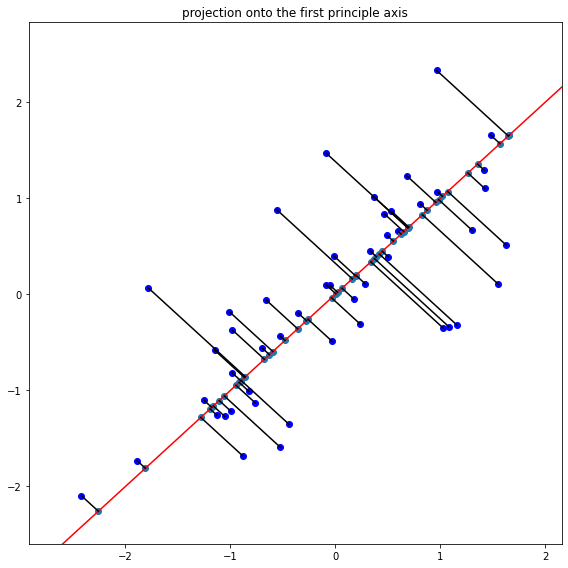

**************************************************
## [RESULT 08]
**************************************************


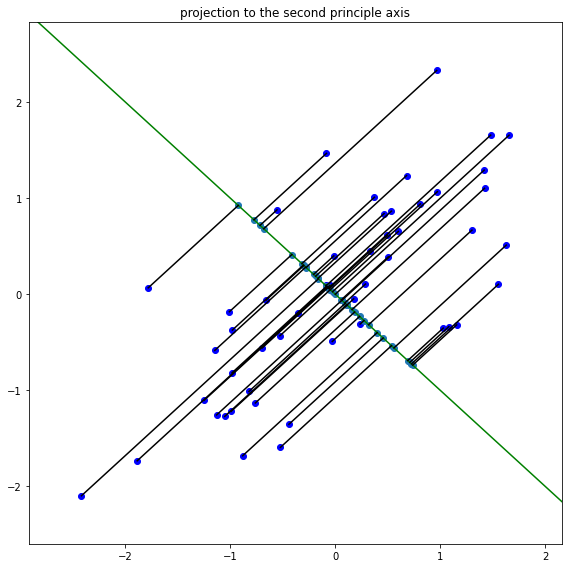

In [18]:
number_result = 8

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)